# Bike Sharing

## 1. Import the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Dataset

In [2]:
df = pd.read_csv("E:\DataScience videos\Dataset\\day.csv",index_col=0)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 3. Check the different DataTypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


## 4. Check for the Null Values

In [4]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 5. Check for the Unique Values and Value Counts

In [5]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [6]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [7]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [8]:
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [9]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [10]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [11]:
df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [12]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

## 6. Convert Numerical to Categorical Feature

In [13]:
# Season
# We can also do like this --> df.loc[(df['season'] ==1), 'season'] = 'spring'

df['season'] = df['season'].replace(1,'spring')
df['season'] = df['season'].replace(2,'summer')
df['season'] = df['season'].replace(3,'fall')
df['season'] = df['season'].replace(4,'winter')

In [14]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# Month

def month_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']] = df[['mnth']].apply(month_map)

In [16]:
df['mnth'].value_counts()

May    62
Oct    62
Dec    62
Jan    62
Mar    62
Aug    62
Jul    62
Apr    60
Sep    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [17]:
# Week Day

def week_map(x):
    return x.map({0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'})

df[['weekday']] = df[['weekday']].apply(week_map)

In [18]:
df['weekday'].value_counts()

Monday       105
Wednesday    105
Tuesday      105
Thursday     104
Sunday       104
Saturday     104
Friday       103
Name: weekday, dtype: int64

In [19]:
# Weather Situation

df.loc[(df['weathersit'] == 1), 'weathersit'] = 'A'
df.loc[(df['weathersit'] == 2), 'weathersit'] = 'B'
df.loc[(df['weathersit'] == 3), 'weathersit'] = 'C'
df.loc[(df['weathersit'] == 4), 'weathersit'] = 'D'

In [20]:
df['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

## 7. Date Time Conversion

In [21]:
df['dteday'] = pd.to_datetime(df['dteday'])

# We can use df['dteday'].astype()

## 8. Check the Normalization for all the Numerical Feature

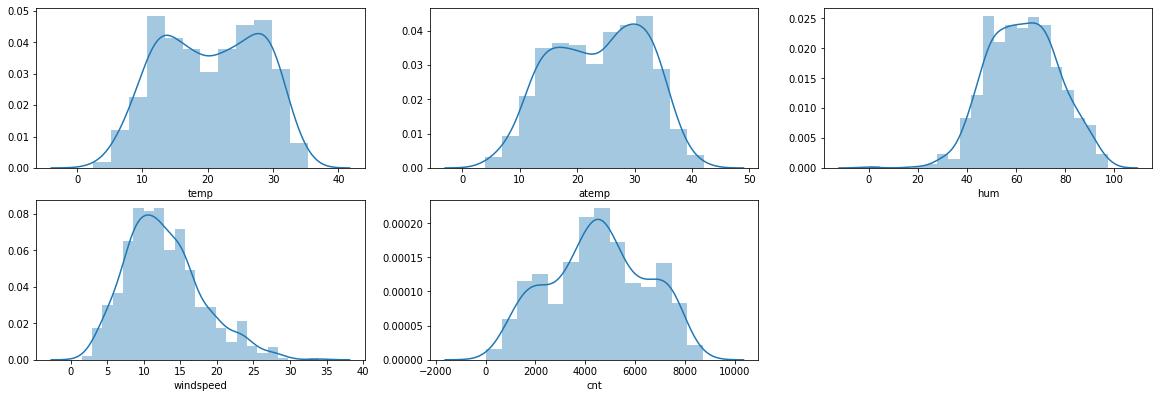

In [22]:
plt.figure(figsize = (20,10))

plt.subplot(3,3,1)
sns.distplot(df['temp'])

plt.subplot(3,3,2)
sns.distplot(df['atemp'])

plt.subplot(3,3,3)
sns.distplot(df['hum'])

plt.subplot(3,3,4)
sns.distplot(df['windspeed'])

plt.subplot(3,3,5)
sns.distplot(df['cnt'])

## 9. Separate Categorical Variable

In [23]:
df_categorical = df.select_dtypes('object')
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


 ###  Box Plot for Categorical Features

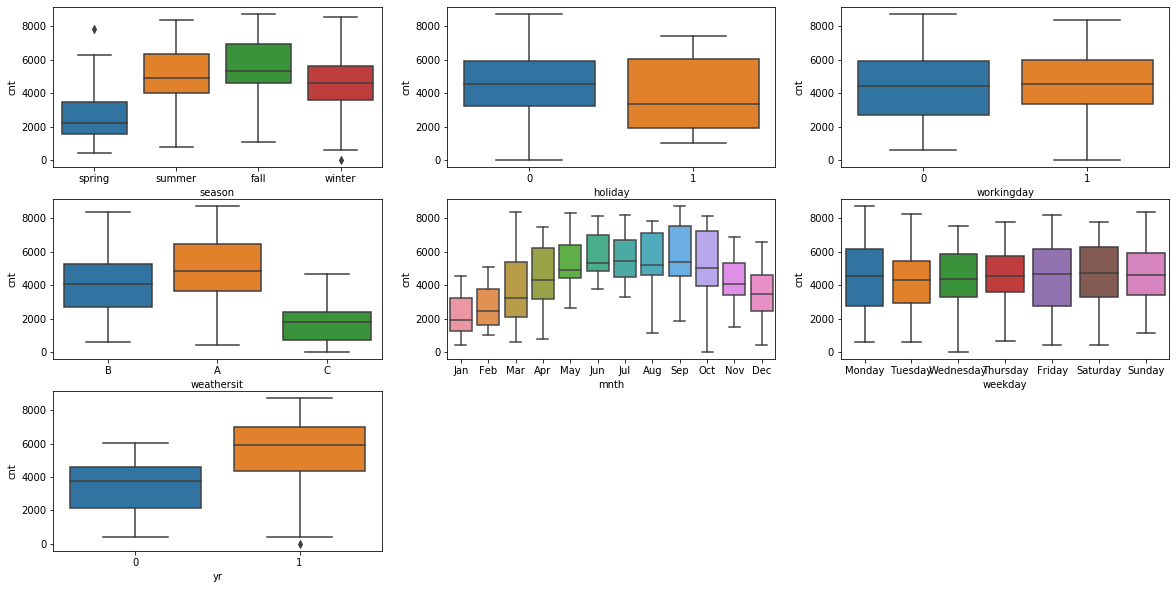

In [24]:
plt.figure(figsize = (20,10))

plt.subplot(3,3,1)
sns.boxplot(x = df['season'], y = df['cnt'])

plt.subplot(3,3,2)
sns.boxplot(x = df['holiday'], y = df['cnt'])

plt.subplot(3,3,3)
sns.boxplot(x = df['workingday'], y = df['cnt'])

plt.subplot(3,3,4)
sns.boxplot(x = df['weathersit'], y = df['cnt'])

plt.subplot(3,3,5)
sns.boxplot(x = df['mnth'], y = df['cnt'])

plt.subplot(3,3,6)
sns.boxplot(x = df['weekday'], y = df['cnt'])

plt.subplot(3,3,7)
sns.boxplot(x = df['yr'], y = df['cnt'])

## 10. Separate Numerical Variable

In [25]:
df_numeric = df.select_dtypes(include=['float64','int64'])
df_numeric = df_numeric.drop(['yr','holiday','workingday'], axis=1)
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### HeatMap for Correlation Check
As Higher Correlation value should be removed.

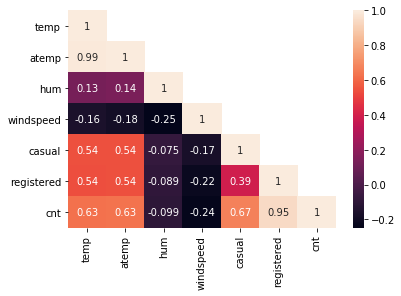

In [26]:
# Correlation Columns
mask = np.array(df_numeric.corr())

# Remove the Mirror images or keep the Lower Triangle and remove the Upper Triangle
mask[np.tril_indices_from(mask)] = False

sns.heatmap(df_numeric.corr(), mask=mask, annot=True)
plt.show()

In [27]:
# Remove the Highly Correlated Variable i.e 'atemp'
df_numeric.drop(['atemp'], axis=1, inplace=True)
df.drop(['atemp'], axis=1, inplace=True)

In [28]:
df_numeric.head()

,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,
1,14.110847,80.5833,10.749882,331,654,985
2,14.902598,69.6087,16.652113,131,670,801
3,8.050924,43.7273,16.636703,120,1229,1349
4,8.200000,59.0435,10.739832,108,1454,1562
5,9.305237,43.6957,12.522300,82,1518,1600


## 11. Dummy Encoding for Categorical Varibles

In [29]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 12. Merging the Data

In [30]:
df = df.drop(list(df_categorical.columns), axis=1)

In [31]:
df = pd.concat([df, df_dummies], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Remove the Date
df.drop(['dteday'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   casual             730 non-null    int64  
 7   registered         730 non-null    int64  
 8   cnt                730 non-null    int64  
 9   season_spring      730 non-null    uint8  
 10  season_summer      730 non-null    uint8  
 11  season_winter      730 non-null    uint8  
 12  mnth_Aug           730 non-null    uint8  
 13  mnth_Dec           730 non-null    uint8  
 14  mnth_Feb           730 non-null    uint8  
 15  mnth_Jan           730 non-null    uint8  
 16  mnth_Jul           730 non

## 13. Building Model
### i. Extract Features

In [34]:
X = df.drop('cnt', axis=1)
y = df['cnt']

### ii. Splitting

In [35]:
from sklearn.model_selection import train_test_split

# We can also do df_train, df_test = train_test_split(X, y, test_size=0.3, random_state=121)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

### iii. Scale, Fit and Transform

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['temp', 'hum', 'windspeed', 'casual',
         'registered']] = scaler.fit_transform(X_train[['temp', 'hum', 'windspeed', 'casual', 'registered']])

X_test[['temp', 'hum', 'windspeed', 'casual',
         'registered']] = scaler.transform(X_test[['temp', 'hum', 'windspeed', 'casual', 'registered']])

### iv. Gradient Boosting Algorithm

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
model.score(X_test,y_test)

0.9954901219624276

In [39]:
model.score(X_train,y_train)

0.9988176795038577